### INSTALACION DE LOS PAQUETES NECESARIOS

In [2]:
! pip install -U spacy
! python -m spacy download en
! pip install spacy
! pip install spacymoji
! pip install emoji
! pip install scikit-learn
! pip install gensim
! pip install sklearn
! pip install matplotlib
! pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 12.8/12.8 MB 2.6 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import spacy
import emoji
import numpy as np
from tqdm import tqdm

from sklearn.cluster import DBSCAN
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.test.utils import get_tmpfile
from matplotlib import pyplot as plt

CARGAR EMBEDINS

In [7]:
datos= np.load(f'./out/embeddings/embeddings5000dim150.npy')

# 3. Clustering

## 3.1. Aplicando algoritmo DBSCAN (PREDETERMINADO) de la libería sklearn

In [8]:
epsilon = 3.5 # Radio de búsqueda
min_pts = 2 # Número mínimo de puntos en un cluster

In [9]:
#document_vectors = [model.infer_vector(doc) for doc in textos_tokenizados]
# Aplicar DBSCAN a los vectores de documentos
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts, leaf_size=5)  # Ajusta los parámetros según tu caso
dbscan_labels = dbscan.fit_predict(np.array(datos))

# Los resultados del clustering están en 'labels'
print("Etiquetas de clusters:", dbscan_labels)


Etiquetas de clusters: [-1 -1 -1 ... -1 -1 -1]


In [10]:
kont = np.sum(dbscan_labels== -1)
print("Clasificadas como ruido: ",kont)
print("Clasificadas como cluster: ",np.sum(dbscan_labels!=-1))

Clasificadas como ruido:  4195
Clasificadas como cluster:  805


In [11]:
sample_cores=np.zeros_like(dbscan_labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True
n_clusters=len(set(dbscan_labels))- (1 if -1 in dbscan_labels else 0)
print('Numero de clusters:',n_clusters)

Numero de clusters: 4


In [12]:
# Inicializa un diccionario para el conteo
conteo_de_valores = {}

# Recorre la lista y cuenta los valores
for label in dbscan_labels:
    if label in conteo_de_valores:
        conteo_de_valores[label] += 1
    else:
        conteo_de_valores[label] = 1
# Imprime el conteo de valores
for label, count in conteo_de_valores.items():
    print(f"Cluster {label}: {count} instancias")

Cluster -1: 4195 instancias
Cluster 0: 796 instancias
Cluster 1: 2 instancias
Cluster 2: 5 instancias
Cluster 3: 2 instancias


Asignar una nueva instancia

In [94]:
from sklearn.metrics.pairwise import cosine_similarity
labels_list = dbscan_labels.tolist()
if 0 in labels_list:
    primera_posicion = labels_list.index(0)
    print(f"La primera posición en la que se encuentra un 0 es: {primera_posicion}")
if 1 in labels_list:
    primera_posicion = labels_list.index(1)
    print(f"La primera posición en la que se encuentra un 1 es: {primera_posicion}")
if 2 in labels_list:
    primera_posicion = labels_list.index(2)
    print(f"La primera posición en la que se encuentra un 2 es: {primera_posicion}")
if 3 in labels_list:
    primera_posicion = labels_list.index(3)
    print(f"La primera posición en la que se encuentra un 3 es: {primera_posicion}")


#selecciono una de estas instancias para probar
indexquery=379
query=datos[indexquery]

#print("Instancia: ",query)

#Calcular los centroides para DBSCAN
centroides=[]
indices_centroides = []
for label in set(dbscan_labels):
    if label!=-1:
        instanciasCluster=datos[dbscan_labels==label]
        centroide=instanciasCluster.mean(axis=0)
        centroides.append(centroide)

#print("Centroides: ",centroides)
# Para ambos algoritmos

# Calcular distancia desde query a cada centroide

distancias = 1- cosine_similarity(query.reshape(1,-1),centroides)[0]

print("Distancias desde la instancia a los centroides:",distancias)
# Asignar la instancia al centroide mas cercano
cluster_asignado = np.argmin(distancias)
distancia_minima = distancias[cluster_asignado]

print(f"La nueva instancia pertenece al cluster {cluster_asignado}")

La primera posición en la que se encuentra un 0 es: 14
La primera posición en la que se encuentra un 1 es: 331
La primera posición en la que se encuentra un 2 es: 379
La primera posición en la que se encuentra un 3 es: 1467
Distancias desde la instancia a los centroides: [0.22236139 0.5229864  0.05563718 0.5643755 ]
La nueva instancia pertenece al cluster 2


In [97]:
from sklearn.decomposition import PCA
#datos
print('Dim datos originally: ',np.array(datos).shape)
pca = PCA(n_components=2,random_state=42)
pca.fit(datos)
datos_reducidos = pca.transform(datos)
print('Dim datos after PCA: ',datos_reducidos.shape)

#centroides
print('Dim centroides originally: ',np.array(centroides).shape)

centroides_reducidos = pca.transform(centroides)
print('Dim centroides after PCA: ',centroides_reducidos.shape)

Dim datos originally:  (5000, 150)
Dim datos after PCA:  (5000, 2)
Dim centroides originally:  (4, 150)
Dim centroides after PCA:  (4, 2)


Reducir dimensiones de centroides

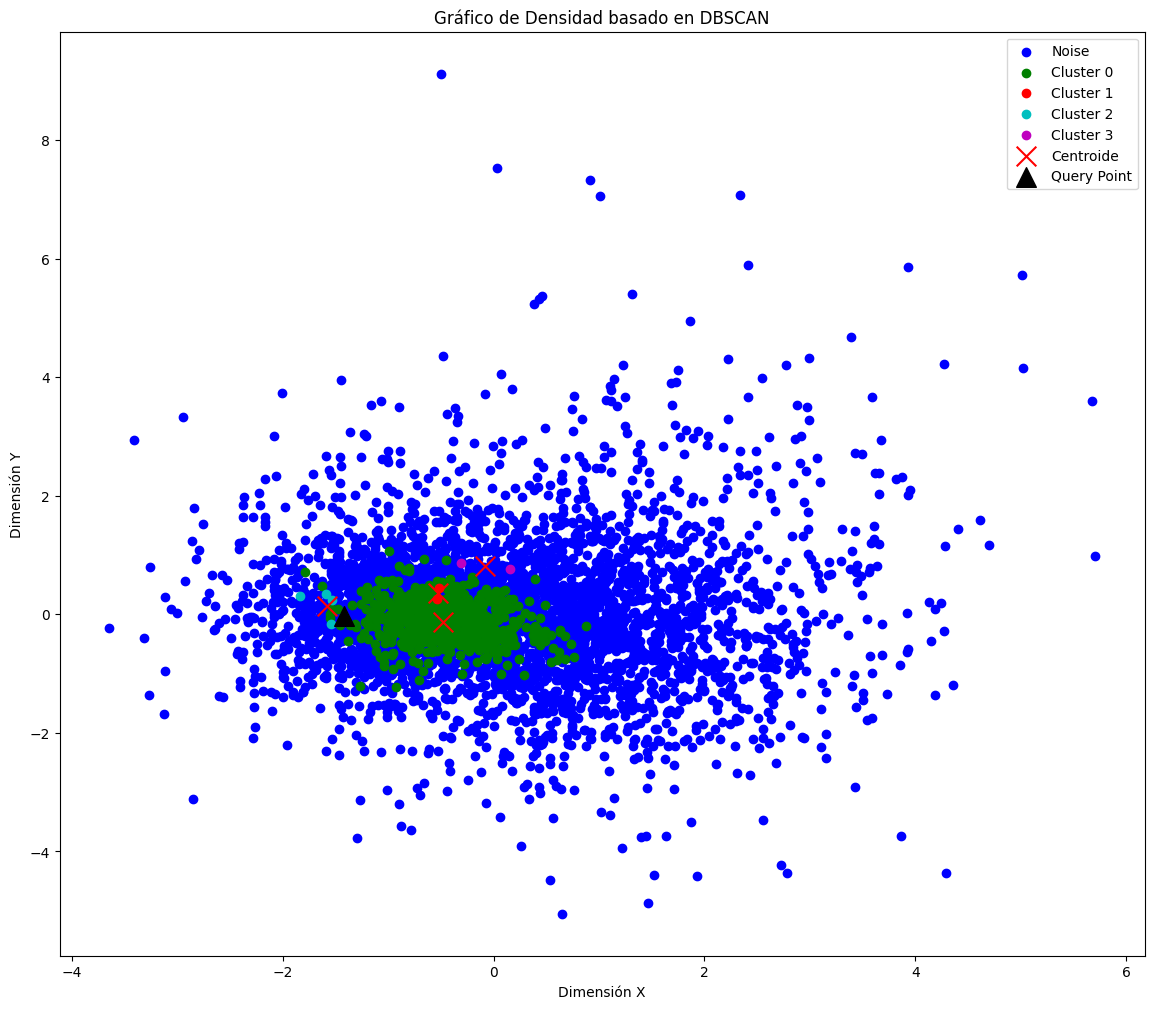

In [98]:


unique_labels = set(dbscan_labels) - {-1}

colores = ['g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'teal', 'lime', 'navy', 'gray']
plt.figure(figsize=(14, 12))
noise_points = np.array([datos_reducidos[i] for i in range(len(datos_reducidos)) if dbscan_labels[i] == -1])
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='blue', label='Noise')

for label in unique_labels:
    cluster_points = np.array([datos_reducidos[i] for i in range(len(datos_reducidos)) if dbscan_labels[i] == label])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colores[label % len(colores)], label=f'Cluster {label}')

centroides_points=np.array([centroides_reducidos[i] for i in range(len(centroides_reducidos))])
plt.scatter(centroides_points[:, 0], centroides_points[:, 1], c='red', marker='x',s=200, label='Centroide')

#for i, centroide in enumerate(centroides):
  #  plt.scatter(centroide[0], centroide[1], c=colores[i % len(colores)], marker='x', s=300, label=f'Centroide {i}')


query_point=datos_reducidos[indexquery]
plt.scatter(query_point[0], query_point[1], c='black', marker='^', s=200, label='Query Point')



plt.title('Gráfico de Densidad basado en DBSCAN')
plt.xlabel('Dimensión X')
plt.ylabel('Dimensión Y')
plt.legend()
plt.show()